In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# 1. EDA

In [19]:
dataset = pd.read_csv(r'C:\Users\vickj\OneDrive\Documents\Foundations of data engineering (Mtech)\03_Udemy_DeepLearning\ANN\Dataset\Part 1 - Artificial Neural Networks\Churn_Modelling.csv')

In [20]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
Gender_table1 = dataset.pivot_table(index='Gender', values='CustomerId', aggfunc='count')
print(Gender_table1)

        CustomerId
Gender            
Female        4543
Male          5457


In [22]:
Geography_table1 = dataset.pivot_table(index='Geography', values='CustomerId', aggfunc='count')
print(Geography_table1)

           CustomerId
Geography            
France           5014
Germany          2509
Spain            2477


# 2. Data Preprocessing

In [23]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

# .values will convert dataset values to numpy Array
# iloc means integer location based indexing 

In [24]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [25]:
#making the gender coloumn binary its also called "Label Encoding"

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [26]:
#One Hot Encoding the "Geography" column

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 3. Creating Layers
## Initializing the ANN 

In [29]:
#creating a sequential neural network model
#In a sequential model, the layers are stacked on top of each other, and the data flows sequentially through these layers.

ann = tf.keras.models.Sequential() 

## Input layer and the first hidden layer

In [30]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Second hidden layer

In [31]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the output layer

In [32]:
#IMPORTANT : If we are doing non binary classification then the activation function must be "SOFTMAX"
#since the y variable is binary then the activation function must be "SIGMOID" => output layer units = 1

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

# 4. Training the ANN

## Compiling the ANN

In [33]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

## Training the ANN on the Training set

In [34]:
ann.fit(X_train,y_train, batch_size=32, epochs = 50)

# Batch_size is 32 means => forward and backward propagation, along with weight updates, will happen 32 times for 
# 1 epoh to complete.

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 0.6394 - accuracy: 0.6326
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4823 - accuracy: 0.7959
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4482 - accuracy: 0.7965
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.7991
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.8087
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4055 - accuracy: 0.8230
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3897 - accuracy: 0.8336
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3752 - accuracy: 0.8440
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8499
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8540

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

So, should we say goodbye to that customer ?

In [35]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 238ms/step
[[False]]


# Predicting the Test set results

In [36]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
np.column_stack((y_pred,y_test))

#0 => stay
#1 => left

63/63 [==============================] - 0s 1ms/step


array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

# Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1511   84]
 [ 190  215]]


0.863

True Positives (TP): The number of correctly predicted positive instances.    
True Negatives (TN): The number of correctly predicted negative instances.    
False Positives (FP): The number of incorrectly predicted positive instances.

False Negatives (FN): The number of incorrectly predicted negative instances. 

So, to directly answer your question, if a lot of people stay in a bank, the churn rate is typically negative, as this indicates good customer retention.

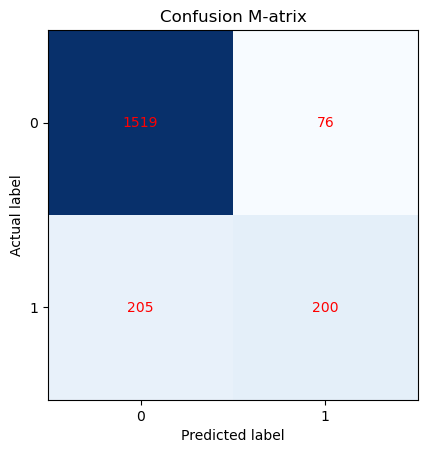

In [38]:
import matplotlib.pyplot as plt
import numpy as np

TN = 1519 #stays in the bank 
FP = 76   #left the bank (incorrect)
FN = 205  #stays in the bank (incorrect)
TP = 200  #left the bank

confusion_matrix = np.array([[TN, FP], [FN, TP]])

plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion M-atrix')


plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{confusion_matrix[i, j]}', ha='center', va='center', color='Red')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()